<a href="https://colab.research.google.com/github/Monica-Restrepo/clases-programacion/blob/main/Practica_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a actuar como analistas de datos de un e-commerce. Recibimos tres bases de datos con la información de los clientes y ventas en 2023 y qué clientes están pre-registrados en Zoop Pay, respectivamente.

Vamos a comenzar uniendo las dos primeras bases de nuestro proyecto ("ventas" y "clientes") en un DataFrame llamado "df" utilizando como clave la columna "ID_compra". Además, vamos a organizar las columnas en la siguiente secuencia: ["ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad", "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico", "ciudad", "estado", "region", "cashback", "nota"]  
Construye un código para ejecutar esta etapa usando Python y la biblioteca Pandas.

In [12]:
import pandas as pd

# Cargar las bases desde las URLs
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)

# Unir los DataFrames por la columna 'ID_compra'
df = pd.merge(ventas, clientes, on='ID_compra')

# Reorganizar las columnas en el orden especificado
orden_columnas = [
    "ID_compra", "fecha", "horario", "categoria", "precio_unitario", "cantidad",
    "envio", "metodo_pago", "ID_cliente", "edad", "sexo_biologico",
    "ciudad", "estado", "region", "cashback", "nota"
]

df = df[orden_columnas]

# Verificar primeras filas
df.head()


,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


Ahora, vamos a la segunda parte del problema, concatenando este DataFrame creado con la base Zoop Pay y ajustando la columna de fecha a formato datetime. Por lo tanto, podemos utilizar el siguiente prompt para la resolución de estos procesos:

Ahora, vamos a unir el "df" con la base "zoop_pay", leída a partir de la URL "url_zoop_pay", generando un nuevo "df". Para unir las bases, utilizaremos la columna "ID_cliente". Además, ajustaremos la columna "fecha" al formato datetime, donde su formato en la base de datos es "YYYY-MM-DD".

In [13]:
# Leer la base zoop_pay desde la URL
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"
zoop_pay = pd.read_csv(url_zoop_pay)

# Unir con el DataFrame df usando la columna ID_cliente
df = pd.merge(df, zoop_pay, on="ID_cliente", how="left")

# Convertir la columna 'fecha' al formato datetime
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d")

# Verificar el resultado
df.head()


,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota,zoop_pay
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10,No
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8,Sí
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7,No
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9,Sí
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9,No


Desafío 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

**Mi pront**

Tenemos un DataFrame llamado "df" y queremos crear un gráfico que muestre la facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

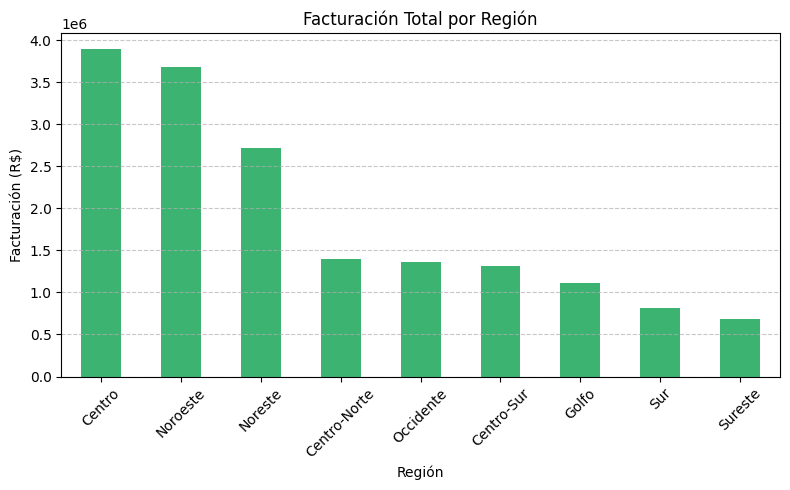

In [14]:
import matplotlib.pyplot as plt

# Calcular la facturación
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# Agrupar por región
facturacion_por_region = df.groupby('region')['facturacion'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
facturacion_por_region.plot(kind='bar', color='mediumseagreen')

# Estética
plt.title('Facturación Total por Región')
plt.xlabel('Región')
plt.ylabel('Facturación (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pront Alura**

Tenemos un DataFrame llamado "df" y queremos construir una visualización de gráfico de columnas que presente la facturación por región de Zoop.
En "df", tenemos las siguientes columnas:
- region: región del/de la cliente
- precio_unitario: precio de una unidad del producto
- cantidad: cantidad vendida del producto
- envio: el valor del envío a ser pago en el total de la compra.
Deseamos crear una visualización que presente la facturación de cada región, donde la facturación se calcula multiplicando el precio unitario por la cantidad y sumando el envío.
Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

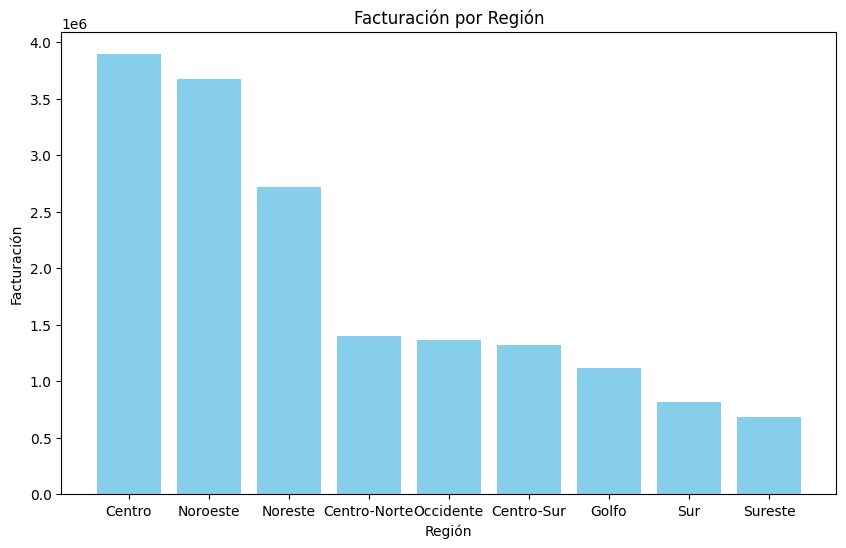

In [15]:
# Calcula la facturación para cada transacción
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# Agrupa los datos por región y suma la facturación
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

# Ordena el resultado para una mejor visualización
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

# Creación del gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.bar(facturacion_por_region['region'], facturacion_por_region['facturacion'], color='skyblue')  # Grafica barras
plt.title('Facturación por Región')  # Añade título al gráfico
plt.xlabel('Región')  # Añade etiqueta al eje X
plt.ylabel('Facturación')  # Añade etiqueta al eje Y
plt.show()  # Muestra el gráfico

Desafío 2:

Zoop quiere realizar una campaña en los estados de México y Puebla, por lo que necesita conocer el perfil de su público según el sexo biológico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composición del público por sexo biológico en los estados de México y Puebla. Recuerda pedir que agrupe o apile los datos para la presentación.

**Mi Pront**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico que muestre la composisción de público por sexo biológico en los estados de México y Puebla. Debes agrupar o apilar los datos. El df contiene las siguientes columnas: estado, sexo_biologico

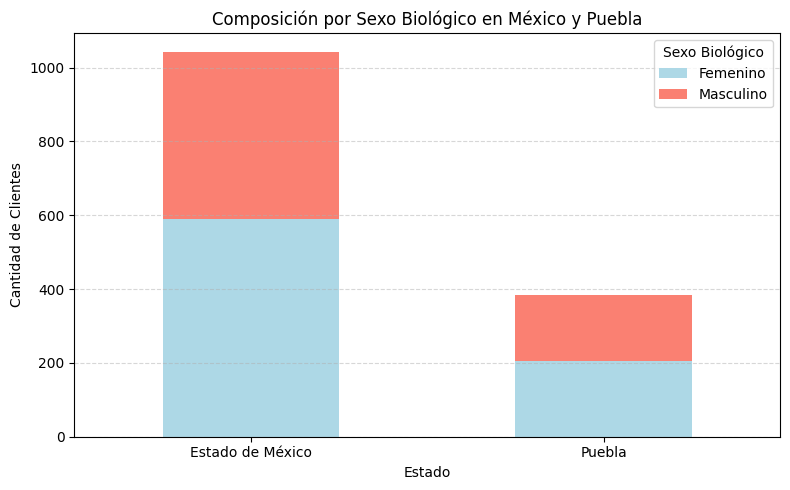

In [16]:
# Filtrar correctamente los estados
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

# Agrupar por estado y sexo, contar
conteo = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack()

# Gráfico de barras apiladas
conteo.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(8,5))

plt.title('Composición por Sexo Biológico en México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Sexo Biológico')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Pront Alura**

Tenemos un DataFrame llamado "df" y queremos construir un gráfico de columnas apiladas que presente la cantidad de personas por sexo biológico en relación con los estados de "México" y "Puebla".

En "df", tenemos las siguientes columnas:

- estado: estado del/de la cliente. Utilizaremos únicamente los estados de "México" y "Puebla"
- sexo_biologico: sexo biológico del/de la cliente

Deseamos crear una visualización que presente la cantidad de personas agrupadas por sexo biológico en los estados que definimos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

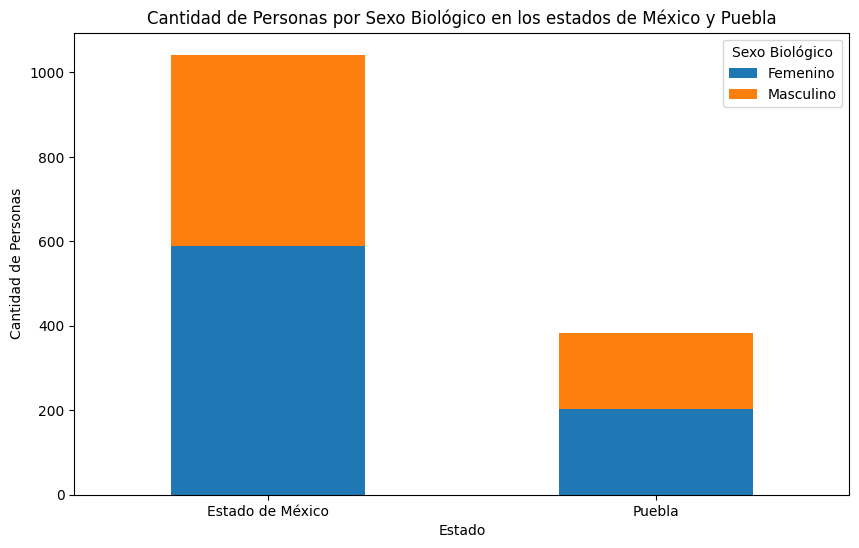

In [17]:
# Filtrar el DataFrame para incluir solo los estados de "México" y "Puebla"
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

# Contar la cantidad de personas por sexo biológico y estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['estado', 'sexo_biologico']).size().unstack(fill_value=0)

# Crear el gráfico de columnas apiladas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas a los ejes
plt.title('Cantidad de Personas por Sexo Biológico en los estados de México y Puebla')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)  # Mantén las etiquetas de los estados en horizontal para mejor legibilidad

# Mostrar la leyenda y el gráfico
plt.legend(title='Sexo Biológico')
plt.show()

In [8]:
url = 'https://gist.githubusercontent.com/ahcamachod/c1cef14e116881abab3239822ebe610a/raw/1ba8ff2bb1d5849e5451be125295167dcc3563eb/panini.csv'

In [9]:
df = pd.read_csv(url)
df.head()

,id,fecha,producto,valor,metodo_pago
0,2720,2023-07-01,Risoto de Funghi,13.0,Tarjeta de Débito
1,2721,2023-07-02,Tiramisú,10.0,Tarjeta de Débito
2,2722,2023-07-02,Tiramisú,10.0,Tarjeta de Crédito
3,2723,2023-07-02,Ratatouille,8.5,Transferencia
4,2724,2023-07-03,Ratatouille,8.5,Efectivo


Tenemos un DataFrame llamado "df" y queremos construir un gráfico de línea que muestre las ventas de "Panini" por mes. Utiliza solo las columnas de "df":

fecha: con la fecha de las ventas ya en formato datetime (aaaa-mm-dd)

valor: con el valor de cada venta.

producto: con los productos vendidos. Vamos a utilizar el producto "Panini".

Agrupa las fechas de la columna "fecha" por mes y agrega los datos solo por la suma de las ventas. Por último, cambia el eje de las fechas para mostrar los meses escritos.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización."""

<ipython-input-10-fc4de52958a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panini['fecha'] = pd.to_datetime(df_panini['fecha'], format='%Y-%m-%d')


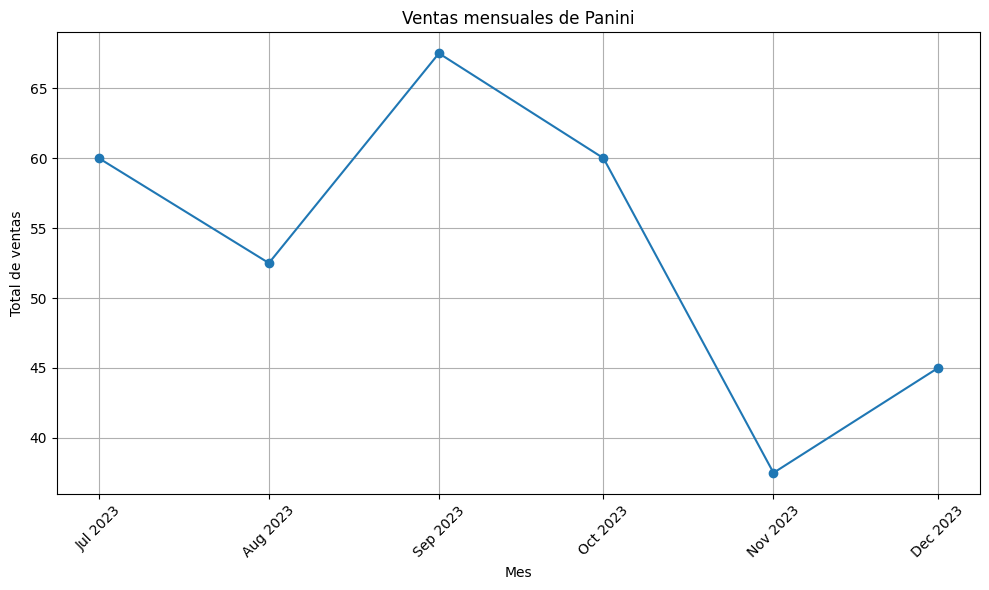

In [10]:
import matplotlib.pyplot as plt

df_panini = df[df['producto'] == 'Panini']
df_panini['fecha'] = pd.to_datetime(df_panini['fecha'], format='%Y-%m-%d')
ventas_por_mes = df_panini.groupby(df_panini['fecha'].dt.to_period('M'))['valor'].sum()
plt.figure(figsize=(10, 6))
plt.plot(ventas_por_mes.index.to_timestamp(), ventas_por_mes, marker='o', linestyle='-')
plt.title('Ventas mensuales de Panini')
plt.xlabel('Mes')
plt.ylabel('Total de ventas')
plt.xticks(ventas_por_mes.index.to_timestamp(), [x.strftime('%b %Y') for x in ventas_por_mes.index.to_timestamp()], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

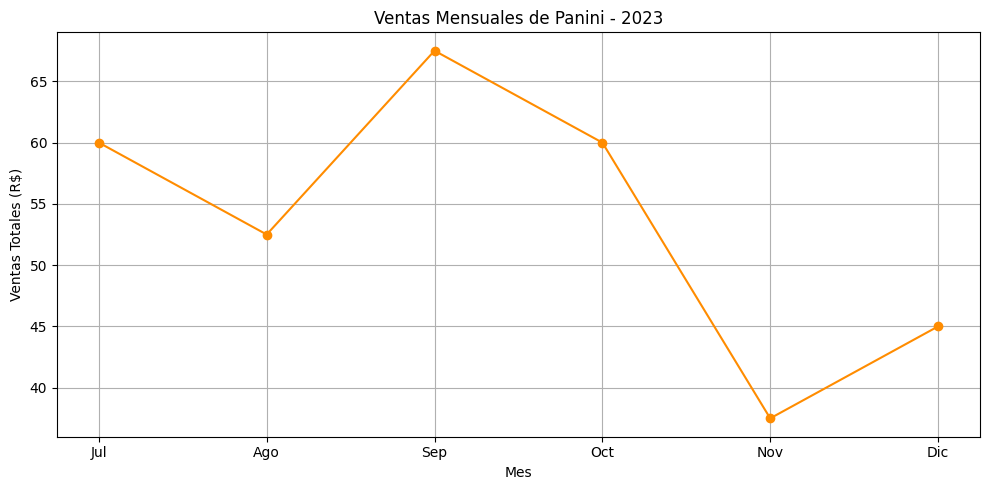

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo las ventas del producto "Panini"
df_panini = df[df['producto'] == 'Panini'].copy()

# Asegurarse de que 'fecha' esté en formato datetime
df_panini['fecha'] = pd.to_datetime(df_panini['fecha'])

# Crear columna con el mes (como nombre en español)
df_panini['mes'] = df_panini['fecha'].dt.month_name()

# Diccionario para traducir al español (si es necesario)
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Agrupar por mes (orden cronológico)
ventas_mensuales = df_panini.groupby(df_panini['fecha'].dt.month)['valor'].sum()

# Renombrar el índice con nombres de meses abreviados en español
ventas_mensuales.index = ventas_mensuales.index.map(lambda x: meses[pd.to_datetime(f'2023-{x}-01').strftime('%B')])

# Graficar
plt.figure(figsize=(10, 5))
ventas_mensuales.plot(kind='line', marker='o', color='darkorange')

# Estética
plt.title('Ventas Mensuales de Panini - 2023')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


#**Gráfico de columnas y barras horizontales**


Un gráfico de columnas es ideal para la representación de valores numéricos de una o más categorías de datos, sean discretas o de intervalos definidos. Facilita una comparación rápida y directa entre diferentes categorías, siendo uno de los gráficos más utilizados en informes y presentaciones.


El gráfico de barras horizontales es ideal cuando queremos presentar las categorías a la izquierda de forma horizontal, siendo la forma más fluida de leer textos que puedan ser extensos. El enfoque de este tipo de gráfico está primero en la categoría de los datos y, en segundo lugar, en los valores numéricos.

#**Gráfico de columnas agrupadas y columnas apiladas**


Un gráfico de columnas o barras agrupadas es ideal cuando queremos comparar diferentes categorías respecto a una variable, mostrando cómo los valores se comparan dentro de cada categoría (en el ejemplo, los trimestres) en columnas separadas (en el ejemplo, productos E, D y F) y entre los diferentes grupos, facilitando la visualización de patrones y diferencias entre ellos.
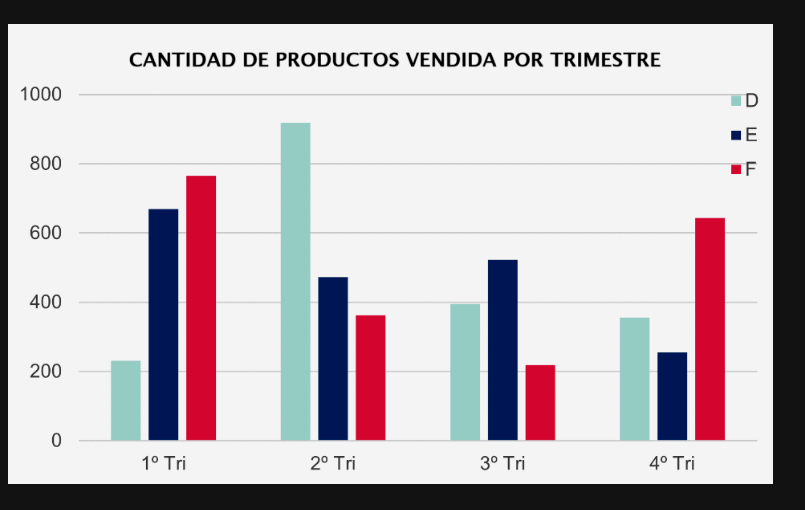
Un gráfico de columnas o barras apiladas es útil cuando queremos añadir a la comparación entre periodos o categorías, la comparación dentro de cada una. Este tipo de gráfico permite observar la composición de cada columna según la variable deseada (por ejemplo, las preferencias de consumo de café o té).

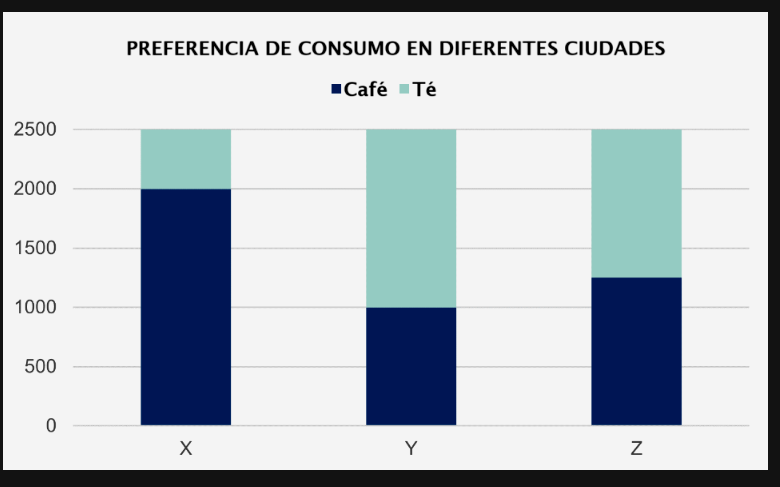

#**Gráfico de línea**


Los gráficos de línea son ideales para representar tendencias a lo largo del tiempo o una secuencia ordenada. Cuando se tiene una gran cantidad de periodos, vale la pena usar gráficos de líneas para representar series temporales.

Los gráficos de líneas añaden una variable categórica a los análisis, permitiendo la comparación de series temporales en períodos de tiempo cortos o largos.

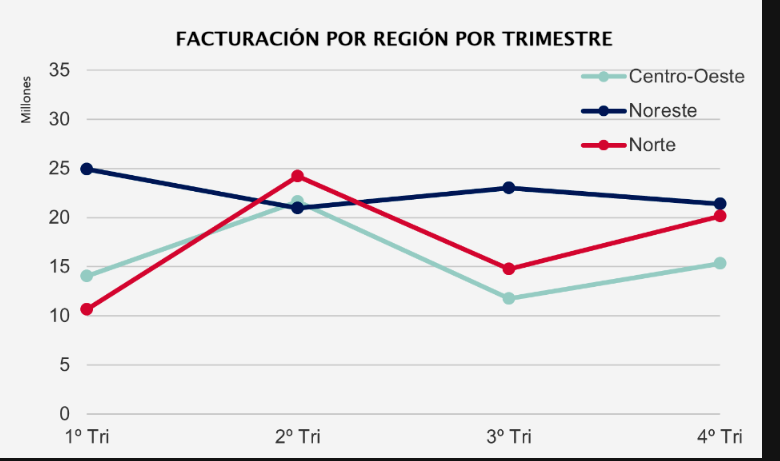

#**Gráfico de pastel y de dona**


El gráfico de pastel se usa para representar proporciones de diferentes categorías o partes de un todo. Es ideal para composiciones estáticas, ya sea por valores numéricos o porcentajes. Hay que tener cuidado de no usar más de 5 categorías o categorías con proporciones muy similares o muy dispares.

El gráfico de dona es una alternativa al gráfico de pastel, adecuado cuando queremos reducir la superficie colorida, pasando a utilizar coronas circulares. Ambos gráficos son ideales para pocas categorías de datos.

#**Gráfico de cascada**

Los gráficos de cascada se usan para visualizar ajustes incrementales a un valor inicial, lo que los hace ideales para ver flujos o fluctuaciones de valores numéricos a lo largo del tiempo.

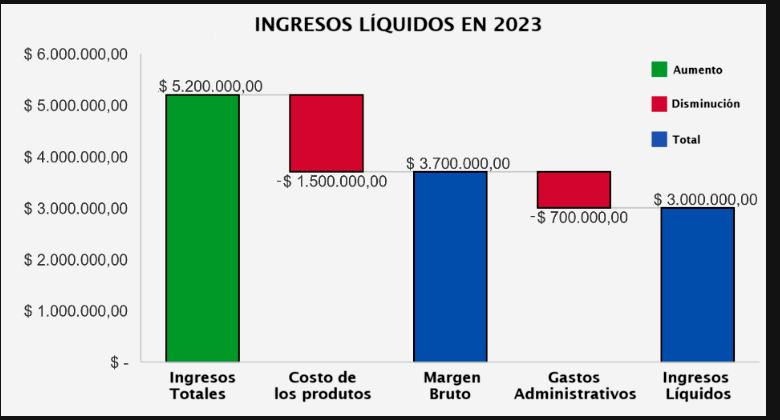

#**Histograma**

Los histogramas se utilizan para observar la distribución de los datos en un intervalo dado. Estos intervalos, llamados "bins", muestran cuántas observaciones caen dentro de esa franja.

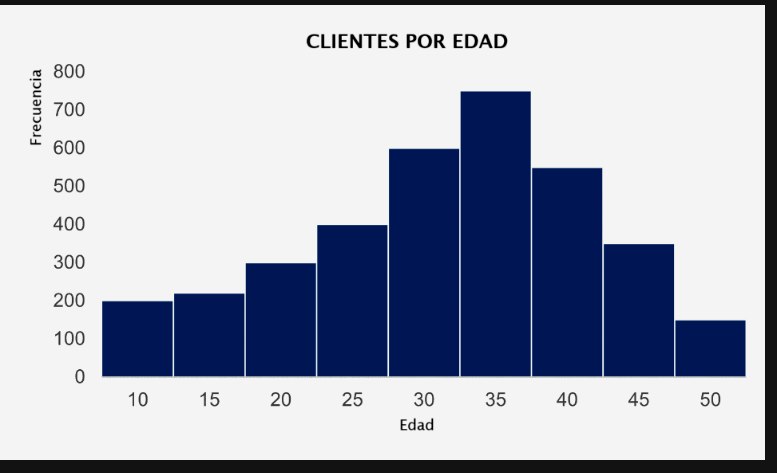

#**Gráfico de dispersión**

Los gráficos de dispersión se utilizan para representar la relación o distribución entre dos variables numéricas. Cada punto en el gráfico representa una combinación de coordenadas, facilitando la identificación de patrones, tendencias y correlaciones importantes para el aprendizaje automático.

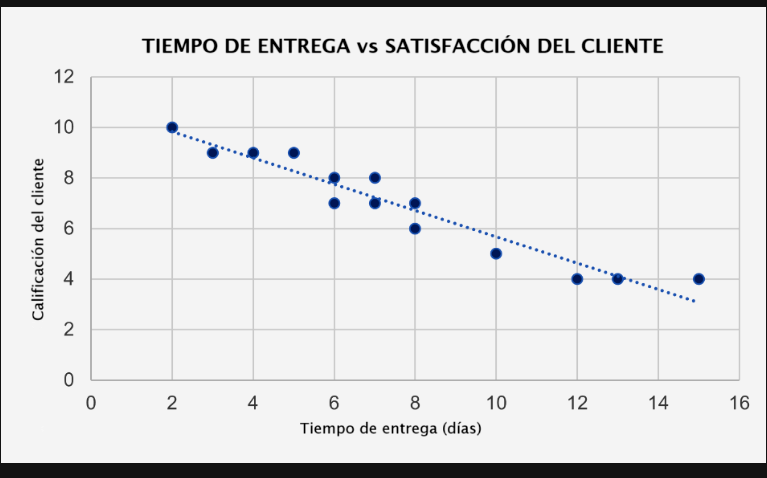

#**Desafío 1:**

Zoop está en proceso de lanzamiento de su billetera digital, que brindará acceso a una serie de beneficios para sus clientes, y le gustaría saber cuál es el porcentaje de personas que ya están pre-registradas para este producto. El e-commerce busca comprender este número para definir la necesidad de promoción y esfuerzo para atraer más clientes a esta funcionalidad.

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que presente la proporción de personas pre-registradas en Zoop Pay.

**Pront** tenemos un dataframe llamado df a partir de esta base de datos, construye un visual que presente la proporción de personas pre-registradas en Zoop Pay.

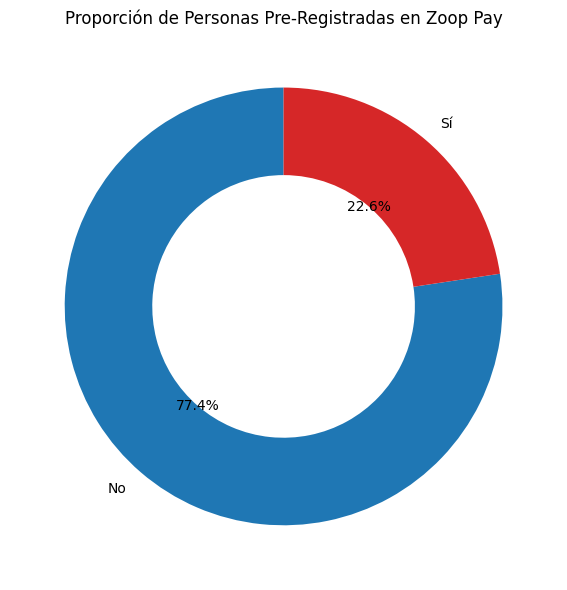

In [19]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada categoría en la columna "pre_registro"
conteo = df['zoop_pay'].value_counts()

# Colores: azul para "Sí", rojo para "No"
colores = ['#1f77b4', '#d62728']  # azul y rojo

# Gráfico de rosquilla
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, colors=colores, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

plt.title('Proporción de Personas Pre-Registradas en Zoop Pay')
plt.tight_layout()
plt.show()

**Pront Alura:** Tenemos un DataFrame llamado "df" y queremos construir una visualización que presente la proporción de los(as) usuarios(as) que realizaron el pre-registro en Zoop Pay, la nueva solución de Zoop.

En "df", tenemos la columna "zoop_pay" que contiene estos datos. Construye un gráfico de dona donde el valor "Sí" reciba el color #2a9d8f y "No" el color #edede9.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

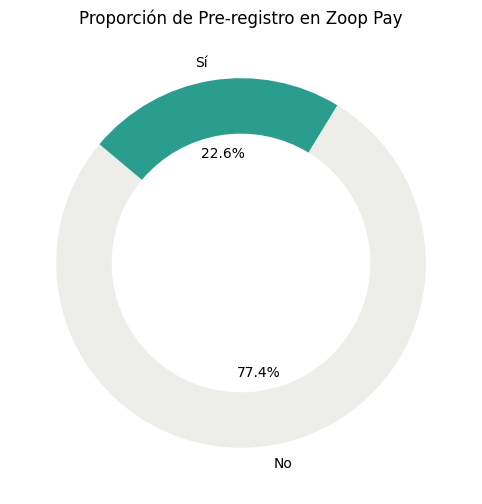

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Contabiliza la cantidad de usuarios que realizaron el pre-registro en Zoop Pay
pre_registro_counts = df['zoop_pay'].value_counts()

# Define los colores para cada valor
colors = ['#2a9d8f' if valor == 'Sí' else '#edede9' for valor in pre_registro_counts.index]

# Crea el gráfico de dona
plt.figure(figsize=(8, 6))
plt.pie(pre_registro_counts, labels=pre_registro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Añade un título al gráfico
plt.title('Proporción de Pre-registro en Zoop Pay')

# Muestra el gráfico
plt.show()

El gráfico generado muestra que menos de ¼ de los clientes que realizaron compras en 2023 en Zoop están registrados para participar en Zoop Pay. Puede ser interesante investigar el perfil de los clientes que aún no han realizado el registro, en situaciones como edad, forma de pago, región de residencia, entre otros.

#**Desafío 2:**

Zoop quiere analizar la distribución de las edades de los clientes por región con el fin de delinear una "persona" (perfil) de su clientela en diferentes localidades del país, y para ello, solicitó un visual que distribuya estos datos. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la distribución de las edades de los clientes por región.

Pront: Tenemos un dataframe llamado df y queremos analizar la distribución de las edades de los clientes por región con el el fin de delinear una "persona" (perfil) de su clientela en diferentes localidades del país, construye un grafico que distribuyta estos datos.

<ipython-input-22-e56e9994cb29>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='edad', palette='Set2')


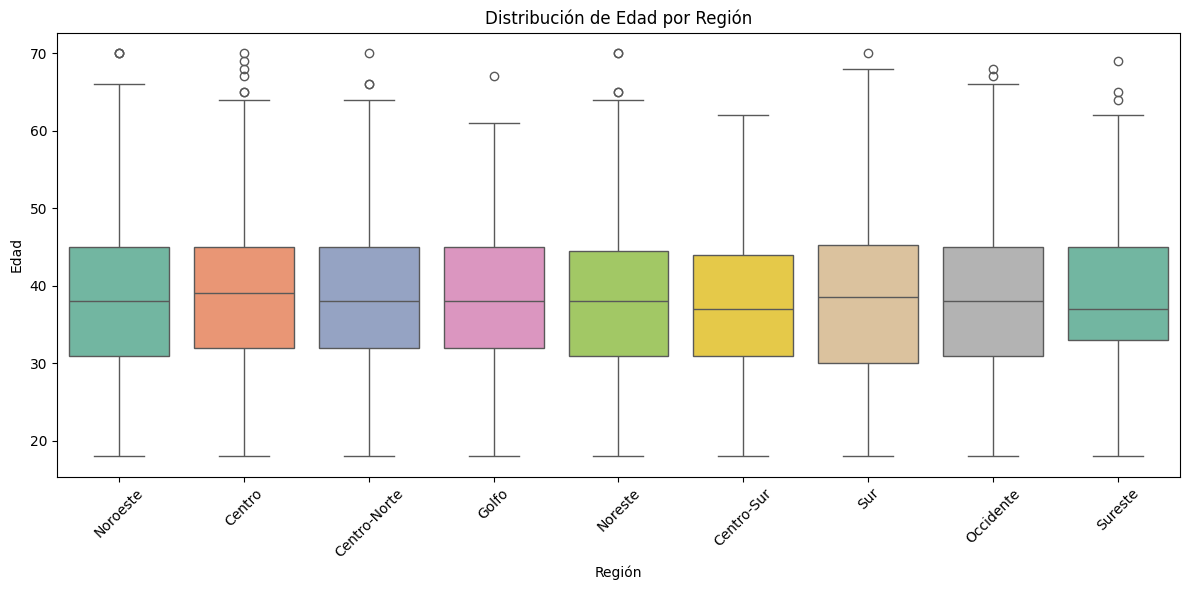

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='edad', palette='Set2')

plt.title('Distribución de Edad por Región')
plt.xlabel('Región')
plt.ylabel('Edad')
plt.xticks(rotation=45)  # para mejor visibilidad si hay muchas regiones
plt.tight_layout()
plt.show()


**Pront Alura:** enemos un DataFrame llamado "df" y queremos construir una visualización que muestre la distribución de las edades de los(as) clientes por región.

En "df", tenemos las siguientes columnas:

region: región de la persona que realizó la compra.

edad: edad de la persona que realizó la compra.

Deseamos crear una visualización de boxplot que presente la distribución de estos datos. Coloca las edades en el eje x y las regiones en el eje y.

Utiliza las bibliotecas de visualización de datos de Python para crear esta visualización.

<ipython-input-21-265243671413>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='edad', y='region', data=df, palette="colorblind")  # Crea el boxplot


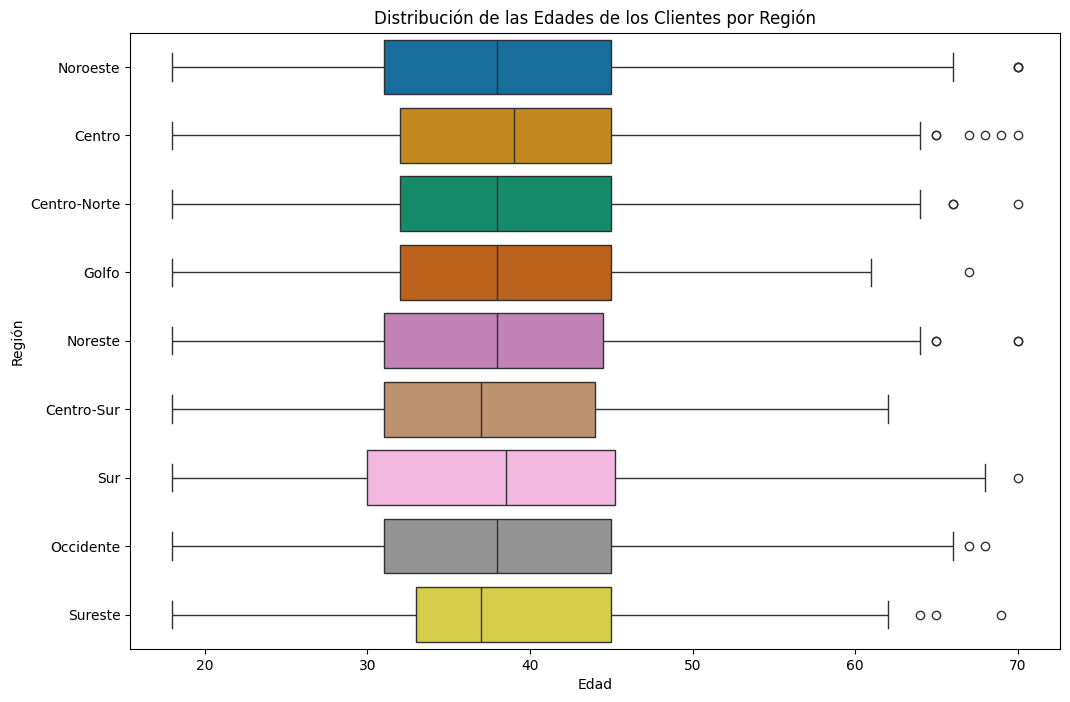

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creación del boxplot
plt.figure(figsize=(12, 8))  # Define el tamaño del gráfico
boxplot = sns.boxplot(x='edad', y='region', data=df, palette="colorblind")  # Crea el boxplot

# Añade títulos y etiquetas a los ejes
plt.title('Distribución de las Edades de los Clientes por Región')  # Título del gráfico
plt.xlabel('Edad')  # Etiqueta del eje X
plt.ylabel('Región')  # Etiqueta del eje Y

# Muestra el gráfico
plt.show()

Este gráfico nos ofrece algunos insights interesantes. Por ejemplo, en las regiones Sur y Centro tenemos clientes con la mayor mediana de edad en comparación con otras, mientras que en la región Centro-Sur hay una mayor concentración de mediana de edad de clientes más jóvenes en relación a todas las regiones de México.